## Approximation of Derivatives

Although the derived function can be gotten from automatic differentiation, the approximation of derivatives can be used in solving differential equations.

### Methods:

List some common algorithm:

1. forward method: $f^\prime(x)\approx\frac{f(x+h)-f(x)}{h}$, $O(h)$
2. backward method: $f^\prime(x)\approx\frac{f(x)-f(x-h)}{h}$, $O(h)$
3. central difference method: $f^\prime(x)\approx\frac{f(x+h)-f(x-h)}{2h}$, $O(h^2)$
4. Richardson extrapolation method: 

$$D(n, m)=D(n, m-1)+\frac{1}{4^{m}-1}[D(n, m-1)-D(n-1, m-1)]$$

where

$$D(n,0)=\varphi(\frac{h}{2^n})$$

and (k is an arbitrary number)

$$\varphi(h)=f^{(k)}(x)-ah^2$$ 

#### Example:

1. Consider the function $f(x)=xe^x$. Obtain approximations to $f^\prime(2)$, with $h=0.5, 0.45,...,0.05$, using the forward, backward and central difference formulas. To visualize how the approximation improves with decreasing step size, plot the error as a function of h.
2. Calculate the first derivative and second derivetive of $f(x)=xe^x$ using Richardson extrapolation, 

$$f^\prime(x)\approx\frac{f(x+h)-f(x-h)}{2h}$$

and 

$$f^{\prime\prime}(x)\approx\frac{f(x+h)-2f(x)+f(x-h)}{h^2}$$

#### Code Example (Julia language):

Problem 1:

22.921701401351555	23.708446185307643	24.52888904047446	25.384587504468854	26.27717373578153	27.208358160708492	28.179933300710008	29.193777789196353	30.25186058719114	31.356245407794766	

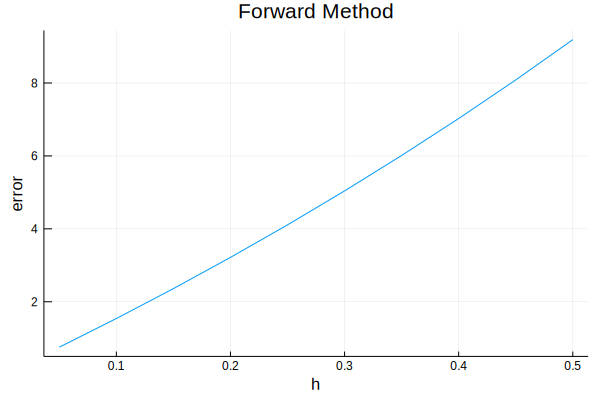

In [5]:
using Plots

# define function
function func(x::Float64)
    return x*exp(x)
end

function derivative(x::Float64)
    return (1+x)*exp(x)
end

# define variables
hList = 0.05:0.05:0.5

# forward method
error = []
for h in hList
    f′ = (func(2+h)-func(2.0))/h
    push!(error, abs(f′-derivative(2.0)))
    print(f′, "\t")
end
plot(hList, error, leg=false, title="Forward Method", xlabel="h", ylabel="error")

21.443428314243604	20.749127575306918	20.082973873652737	19.443733809589983	18.830230059405096	18.241338773083545	17.67598709432729	17.13315079707279	16.611852032990335	16.111157184708407	

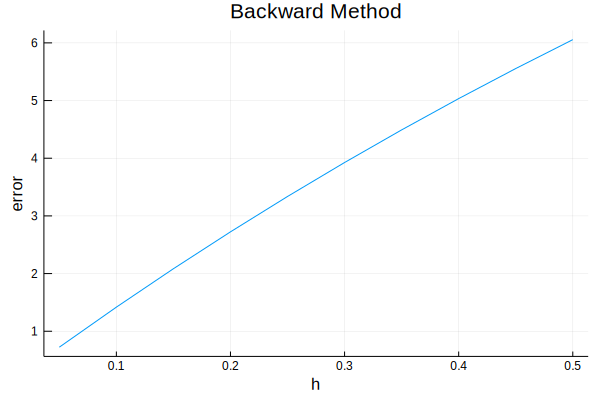

In [6]:
# backward method
error = []
for h in hList
    f′ = (func(2.0)-func(2.0-h))/h
    push!(error, abs(f′-derivative(2.0)))
    print(f′, "\t")
end
plot(hList, error, leg=false, title="Backward Method", xlabel="h", ylabel="error")

22.18256485779758	22.22878688030728	22.305931457063597	22.414160657029417	22.553701897593314	22.72484846689602	22.927960197518647	23.16346429313457	23.431856310090737	23.73370129625159	

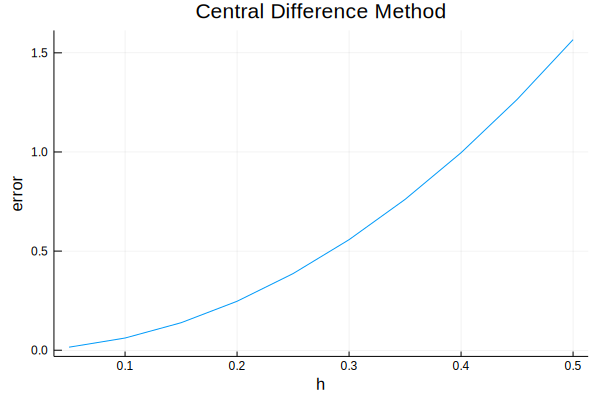

In [7]:
# cnetral difference method
error = []
for h in hList
    f′ = (func(2+h)-func(2-h))/(2*h)
    push!(error, abs(f′-derivative(2.0)))
    print(f′, "\t")
end
plot(hList, error, leg=false, title="Central Difference Method", xlabel="h", ylabel="error")

#### Code Example (Julia language):

Problem 2:

In [15]:
using Printf

# define variables
ϵ = 1e-4  # tolerance
h₀ = 0.5  # initial h

# first derivative
# define φ
function φ(h)
    return (func(2.0+h)-func(2.0-h))/(2*h)
end

# print Richardson table
@printf("Richard Table of First Derivative\n")
previous = [0.0,]
new = [0.0,]
h = h₀
for i in 1:100
    new = [φ(h),]
    for j in 2:i
        push!(new, new[j-1] + (new[j-1]-previous[j-1]) / (4.0^j-1))
    end
    
    for j in 1:i
        @printf("%.4f\t", new[j])
    end
    @printf("\n")
    
    if(i>1 && (abs(new[i]-new[i-1])<ϵ || abs(new[i]-previous[i-1])<ϵ))
        break
    else
        h /= 2.0
        previous = new
    end
end


# second derivative
# define φ
function φ(h)
    return (func(2.0+h)+func(2.0-h)-2*func(2.0)) / h^2.0
end

# print Richardson table
@printf("\nRichard Table of Second Derivative\n")
previous = [0.0,]
new = [0.0,]
h = h₀
for i in 1:100
    new = [φ(h),]
    for j in 2:i
        push!(new, new[j-1] + (new[j-1]-previous[j-1]) / (4.0^j-1))
    end
    
    for j in 1:i
        @printf("%.4f\t", new[j])
    end
    @printf("\n")
    
    if(i>1 && (abs(new[i]-new[i-1])<ϵ || abs(new[i]-previous[i-1])<ϵ))
        break
    else
        h /= 2.0
        previous = new
    end
end

Richard Table of First Derivative
23.7337	
22.5537	22.4750	
22.2635	22.2441	22.2405	
22.1912	22.1864	22.1855	22.1853	
22.1732	22.1720	22.1717	22.1717	22.1717	

Richard Table of Second Derivative
30.4902	
29.7878	29.7409	
29.6140	29.6024	29.6002	
29.5707	29.5678	29.5672	29.5671	
29.5598	29.5591	29.5590	29.5589	29.5589	
